**Convolutional Neural Network**

# **Importing Libraries**

In [1]:
# Sequential API to create models
from keras.models import Sequential

#Components to create a model
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten

# Stochastic Gradient Descent Algorithm
from keras.optimizers import SGD

# Keras already hosted MNIST dataset for us
from keras.datasets import mnist

# An Keras utility to binarize integers
from keras.utils import to_categorical

# An Keras utility to visualize model graph
from keras.utils import plot_model

# Another ML library that has many utilities for image operation
import skimage

# Here we will use only two of it's utilities
from skimage.io import imshow

# Another python library for plotting things
import matplotlib.pyplot as plt

# Another python library to manipulate vectors, matrices, arrays etc.
import numpy as np

# **Hyperparameters**

In [2]:
# Whole dataset splits into batches
batch_size = 128

# Number of labels of our dataset
num_classes = 10

# Number of times we want to train the model
num_epoch = 10

# **Load Data**

In [3]:
# Load MNISR dataset
# Data split into two sub-set: Training and Testing
(X_train, y_train), (X_test, y_test) = mnist.load_data() #Data will split according to the default settings

# **Data Statistics**

In [4]:
print("Number of Training Samples:", len(X_train))
print("Number of Associated Labels:", len(y_train))

Number of Training Samples: 60000
Number of Associated Labels: 60000


In [5]:
print("Shape of Training Data:",X_train.shape)

Shape of Training Data: (60000, 28, 28)


(Samples, m,n)  
28*28 is the dimension of each sample image.


In [6]:
print("Data Type of Training Samples:",X_train.dtype)

Data Type of Training Samples: uint8


unsigned integer type data

In [7]:
print("Data Type of Training Labels:",y_train.dtype)

Data Type of Training Labels: uint8


In [8]:
print("Shape of Training Labels:",y_train.shape)

Shape of Training Labels: (60000,)


Label is a single integer value for each image.

In [9]:
print("Number of Testing Samples:", len(X_test))
print("Number of Associated Labels:", len(y_test))

Number of Testing Samples: 10000
Number of Associated Labels: 10000


In [10]:
print("Shape of Test Data:",X_test.shape)

Shape of Test Data: (10000, 28, 28)


In [11]:
print("Data Type of Test Data:",X_test.dtype)

Data Type of Test Data: uint8


In [12]:
print("Shape of Test Labels:",y_test.shape)

Shape of Test Labels: (10000,)


(10000,) -> We can consider this as 1D vector of 10000 samples

# **Visualize Data**

In [13]:
# A single sample among 60,000 samples
X_train[0].shape

(28, 28)

In [14]:
a_random_sample = X_train[69]
# Pixel values of the sample
a_random_sample

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 203,
        254, 252, 252, 252, 214,  51,  20,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  62, 221,
        252, 250, 250, 250, 252, 250, 160,  20,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  62, 211, 250,
        252, 250, 250, 250, 252, 250, 250,  49,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  41, 221, 250, 250,
        252, 250, 250, 250, 252, 250, 128,  10,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 254, 252, 252, 252,
        254, 252, 252, 252, 254, 252, 252,  90,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 150, 190, 250, 250,
        252, 250, 250, 169, 171, 250, 250, 250,  82,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 191, 250, 250,
        252, 189, 100,  20, 172, 250, 250, 250,  80,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 213, 250, 250, 250,
        212,  29,   0,   0, 252, 250, 250, 250,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  92, 252, 252, 252,
          0,   0,   0,   0,  51, 252, 252, 252, 203,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  82, 252, 250, 250, 169,
          0,   0,   0,   0, 132, 250, 250, 250, 121,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  92, 231, 252, 250, 159,  20,
          0,   0,   0,   0, 252, 250, 250, 250,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  30, 211, 252, 250, 221,  40,
          0,   0,   0,   0,  90, 250, 250, 250, 163,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  31, 213, 254, 232,  80,   0,
          0,   0,   0,   0,  92, 252, 252, 212, 163,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 151, 250, 252, 149,   0,   0,
          0,   0,   0,   0, 252, 250, 250,  49,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  60, 221, 252, 210,  60,   0,
          0,   0,   0,   0, 252, 250, 250,  49,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 202, 252, 250, 221,  40,
          0,   0, 123, 202, 252, 250, 250,  49,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 123, 243, 255, 252, 252, 252,
        254, 252, 252, 252, 254, 252, 100,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 121, 171, 250, 250, 250,
        252, 250, 250, 250, 252, 250, 100,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  20, 160, 250, 250,
        252, 250, 250, 250, 252, 189,  40,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

/tmp/ipython-input-15-1069867820.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(a_random_sample)


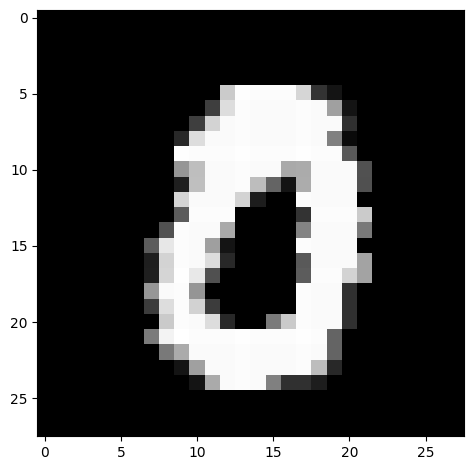

In [15]:
# Displaying it
imshow(a_random_sample)

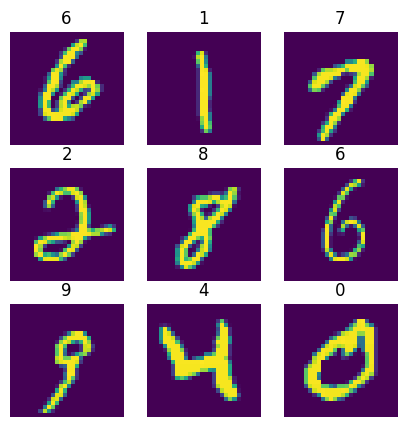

In [16]:
# Plotting 9 image from the dataset
# Define the size of the figure
plt.figure(figsize=(5, 5))

for i in range(9): # i starts from 0 and ends at 8
  ax = plt.subplot(3, 3, i + 1)

  #Get a sample at index i
  an_image = X_train[i+13]

  #Display the image
  plt.imshow(an_image)

  #Display the label of the sample as title
  plt.title(int(y_train[i+13])) #type casting to integer

  plt.axis("off")

One neuron takes only one value. Cannot take matrix as input.  
So, every neuron will take a pixel value from the image grid of ```28*28 ```  
So, number of neuron required is = 28*28 = 784 at the input layer.  
We need the convert the image into 1D values for giving input to the model.

# **Change Data Type of Train and Test Data**

**We don't have to flatten the data for CNN**

In [17]:
print("Previous DataType of Train and Test samples:")
print(X_train.dtype)
print(X_test.dtype)

# Change data type of train and test data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print("New DataType of Train and Test samples:")
print(X_train.dtype)
print(X_test.dtype)

Previous DataType of Train and Test samples:
uint8
uint8
New DataType of Train and Test samples:
float32
float32


# **Rescaling Data**

Scaling the pixel values to the range (0,1)

In [18]:
# Get a random sample
a_sample = X_train[0]

print("Min value of the sample:",a_sample.min())
print("Max value of the sample:",a_sample.max())

Min value of the sample: 0.0
Max value of the sample: 255.0


range 0-255

In [19]:
# Devide each value in train and test data by 255
X_train = X_train/255
X_test = X_test/255

In [20]:
# Get a random sample
a_sample = X_train[0]

print("Min value of the sample:",a_sample.min())
print("Max value of the sample:",a_sample.max())

Min value of the sample: 0.0
Max value of the sample: 1.0


# **Reshape Train and Test Data to 4D**

This section is necessary because the 'Conv2D' from Keras only takes 4D input

In [21]:
print("Previous shape of Train Data:",X_train.shape)
print("Previous shape of Test Data:",X_test.shape)

Previous shape of Train Data: (60000, 28, 28)
Previous shape of Test Data: (10000, 28, 28)


In [22]:
# Make sure images have shape (28,28,1)
# We want to expand a dimension at the end
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

print("New Shape of Train Data:",X_train.shape)
print("New Shape of Test Data:",X_test.shape)

New Shape of Train Data: (60000, 28, 28, 1)
New Shape of Test Data: (10000, 28, 28, 1)


1 indicates that there is only one channel. Meaning it's a grayscale image. For RGB image we would have 3 channels and the dimension would be (28,28,3)

# **Binarize Labels**

In [23]:
# Display the training Labels
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [24]:
# Shape
y_train.shape

(60000,)

The following is an example for understanding

In [25]:
# A random array
input_array = np.array([0,1, 2, 3, 4, 5, 6, 7, 8, 9])
print(input_array)
print("Input array shape:",input_array.shape)

# Apply to_categorical to the random array
output = to_categorical(input_array,num_classes=10)

print(output)
print("Output shape:",output.shape)

[0 1 2 3 4 5 6 7 8 9]
Input array shape: (10,)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Output shape: (10, 10)


Every number will be represented by unique binary sequence of 0 and 1.  
This is important because the activation function at the output layer gives output in 1 or 0. So, we need to compare them with labels in ones and zeroes

In [26]:
# Apply to_categorical to train labels
Y_train = to_categorical(y_train,num_classes)

# Apply to_categorical to test labels
Y_test = to_categorical(y_test,num_classes)

# **Define Model**

In [27]:
# Define a input shape for our CNN
input_shape = (28,28,1) # dimension of every image

In [28]:
# Keras provides Sequenctial API to create models
model = Sequential()

# Set up input layer
model.add(Input(shape=input_shape))

# 1st Conv layer
model.add(Conv2D(32, kernel_size=(3,3), activation='relu')) # 32 is the number of features we want to extract from a single image

# 1st Pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd Conv layer
model.add(Conv2D(64, kernel_size=(3,3), activation='relu')) # 64 will be the feature map size here

# 2nd Pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten our 4D tensor to 1D
model.add(Flatten())

# Last Dense layer to make classification
model.add(Dense(num_classes, activation='softmax'))

# **Compile Model**

In [29]:
# Choose learning rate
learning_rate = 0.001

# Select optimizer
optimizer = SGD(learning_rate=learning_rate)

# Select loss function
loss = "categorical_crossentropy"

# Select evaluation metrics
metrics = ["accuracy"]

# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# **Visualize Model**

In [30]:
# A summary of inputs, outputs in each layer
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

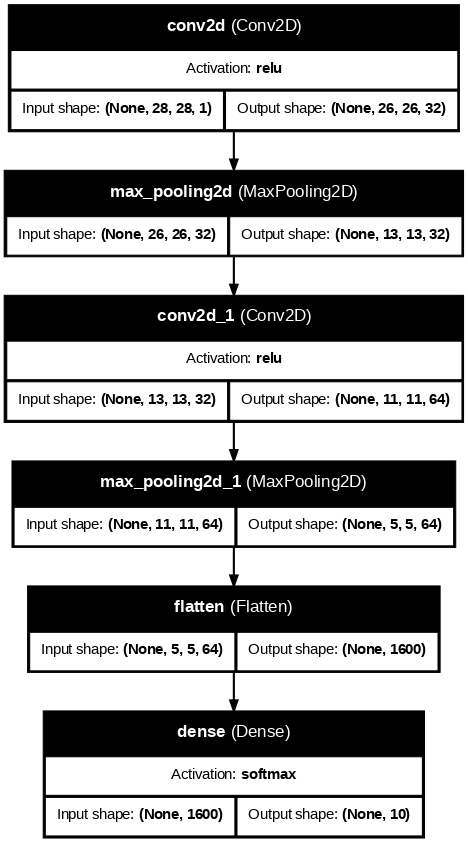

In [31]:
plot_model(model,dpi =75,show_shapes=True,show_layer_names=True,show_layer_activations=True)

# **Model Train**

In [32]:
# Train
history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=num_epoch)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.1407 - loss: 2.2868
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.2584 - loss: 2.2251
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.5330 - loss: 2.1223
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.6785 - loss: 1.9011
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.7297 - loss: 1.4451
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - accuracy: 0.7885 - loss: 0.9624
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 55ms/step - accuracy: 0.8250 - loss: 0.7022
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.8485 - loss: 0.5815
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.8648 - loss: 0.5066
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.8743 - loss: 0.4605


# **Inference on Test Data**

In [33]:
# Evaluate
evaluation = model.evaluate(X_test, Y_test)

# Display test statistics
print("Summary: Loss over the test dataset: %.2f, Accuracy: %.2f" % (evaluation[0]*100, evaluation[1]*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8672 - loss: 0.4657
Summary: Loss over the test dataset: 41.23, Accuracy: 88.80


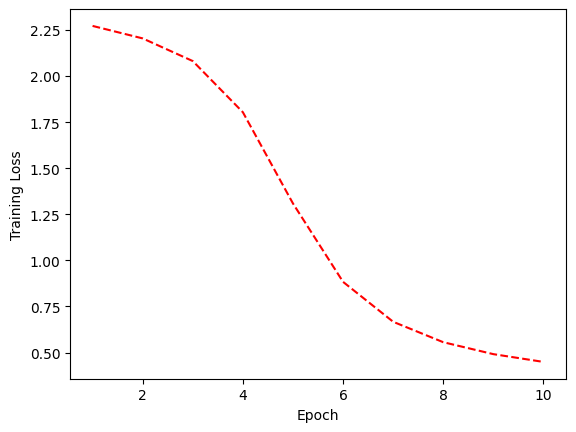

In [34]:
# Get training loss history
training_loss = history.history['loss']

#Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.show()

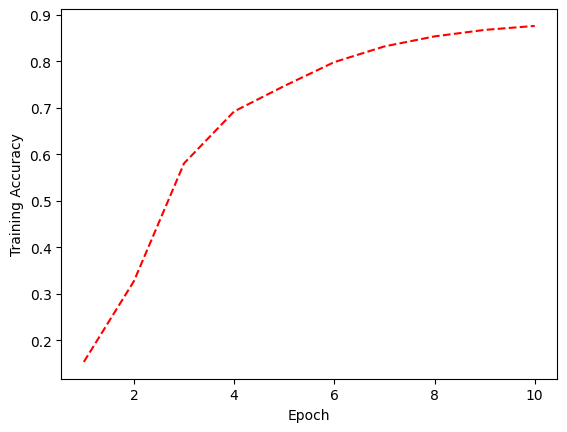

In [35]:
# Get training accuracy history
training_accuracy = history.history['accuracy']

#Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_accuracy, 'r--')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.show()